In [1]:
from scipy.stats import chi2, kstest, norm, lognorm, laplace
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import math
%matplotlib inline

# Lehmer Method
#### Modeling of a basic random variable in order to use it in subsequent modeling

In [2]:
def multiplicative_congruential_method(seed, size):
    time.sleep(0.001)
    coefficient = 1103515245
    modulo = 2**32 
    numbers = []
    number = seed
    for i in range(size):
        number = (coefficient * number) % modulo
        numbers.append(number / modulo)
    return numbers

# Normal Random Variable
#### Modeling of a normal random variable via central limit theorem

In [3]:
def normal_random_variable(size, mean, variance, sample=12):
    numbers = []
    for i in range(size):
        number = 0
        number += np.array(multiplicative_congruential_method(time.time(), sample)).sum()
        number -= sample/2
        number *= (12/sample)**0.5
        number *= (variance**0.5)
        number += mean
        numbers.append(number)
    return numbers

# Log-Normal Random Variable
#### Modeling of a log-normal random variable via functional transformation 

In [4]:
def lognormal_random_variable(size, mu, sigma):
    numbers = []
    for i in range(size):
        number = normal_random_variable(1, 0, 1)[0]
        number = math.e**(mu+sigma*number)
        numbers.append(number)
    return numbers

# Laplace Random Variable
#### Modeling of a laplace random variable via inverse function

In [5]:
def laplace_random_variable(size, loc, scale):
    numbers = []
    coefficients = multiplicative_congruential_method(time.time(), size)
    for i in range(size):
        if coefficients[i] < 0.5:
            number = math.log(2*coefficients[i])
        else:
            number = -math.log(2*(1-coefficients[i]))
        number *= scale
        number += loc
        numbers.append(number)
    return numbers        

# Validation

#### Normal Random Variable

Expected mean: 2
Observed mean: 1.859055531978607
Expected variance: 16
Observed variance: 15.75170927425682


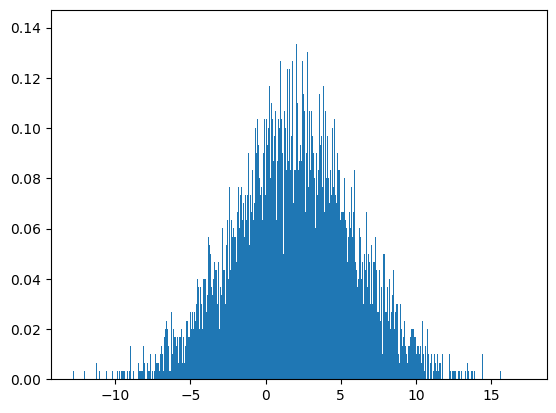

Chi-Square Statistic: 984.3608557725639
P-value: 0.61476037167697
K-S Statistic: 0.017244473026021057
P-value: 0.005163978399593638


In [6]:
mean = 2
variance = 16

sample = normal_random_variable(10000, mean, variance)

expected_mean = mean
expected_variance = variance
observed_mean = np.array(sample).mean()
observed_variance = np.array(sample).var()
print(f'Expected mean: {expected_mean}')
print(f'Observed mean: {observed_mean}')
print(f'Expected variance: {expected_variance}')
print(f'Observed variance: {observed_variance}')

count, bins, ignored = plt.hist(sample, 1000, density=True)
plt.show()

expected_freq = norm.pdf(bins, mean, np.sqrt(variance)) * len(sample) * (bins[1] - bins[0])
observed_freq = count * len(sample) * (bins[1] - bins[0])
chi_square_stat = ((observed_freq - expected_freq[:-1]) ** 2 / expected_freq[:-1]).sum()
dof = len(bins) - 1 - 2
p_value = chi2.sf(chi_square_stat, dof)
print(f'Chi-Square Statistic: {chi_square_stat}')
print(f'P-value: {p_value}')

ks_stat, p_value = kstest(sample, 'norm', args=(mean, np.sqrt(variance)))
print(f'K-S Statistic: {ks_stat}')
print(f'P-value: {p_value}')

#### Log-Normal Random Variable

Expected mean: 0.41686201967850844
Observed mean: 0.3793762022475405
Expected variance: 0.04935621669798469
Observed variance: 0.00947097767587643


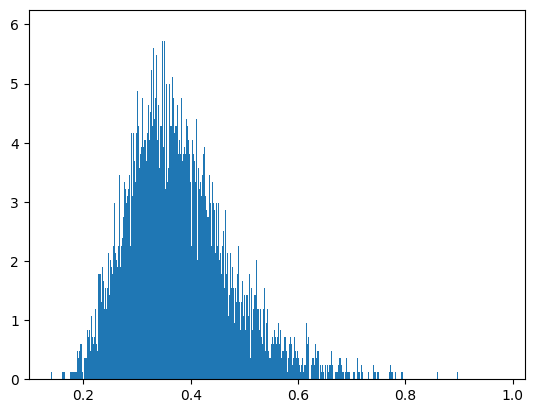

Chi-Square Statistic: 1040.8609615009286
P-value: 0.16831871693594133
K-S Statistic: 0.007537342206684172
P-value: 0.6180944023789644


In [7]:
mu = -1
sigma = 0.25

sample = lognormal_random_variable(10000, mu, sigma)

expected_mean = math.e**(mu+sigma/2)
expected_variance = (math.e**sigma-1)*math.e**(2*mu+sigma)
observed_mean = np.array(sample).mean()
observed_variance = np.array(sample).var()
print(f'Expected mean: {expected_mean}')
print(f'Observed mean: {observed_mean}')
print(f'Expected variance: {expected_variance}')
print(f'Observed variance: {observed_variance}')

count, bins, ignored = plt.hist(sample, 1000, density=True)
plt.show()

expected_freq = lognorm.pdf(bins, sigma, 0, np.exp(mu)) * len(sample) * (bins[1] - bins[0])
observed_freq = count * len(sample) * (bins[1] - bins[0])
chi_square_stat = ((observed_freq - expected_freq[:-1]) ** 2 / expected_freq[:-1]).sum()
dof = len(bins) - 1 - 2
p_value = chi2.sf(chi_square_stat, dof)
print(f'Chi-Square Statistic: {chi_square_stat}')
print(f'P-value: {p_value}')

ks_stat, p_value = kstest(sample, 'lognorm', args=(sigma, 0, np.exp(mu)))
print(f'K-S Statistic: {ks_stat}')
print(f'P-value: {p_value}')

#### Laplace Random Variable

Expected mean: 0
Observed mean: 0.02226085129511984
Expected variance: 4.5
Observed variance: 4.45471822100732


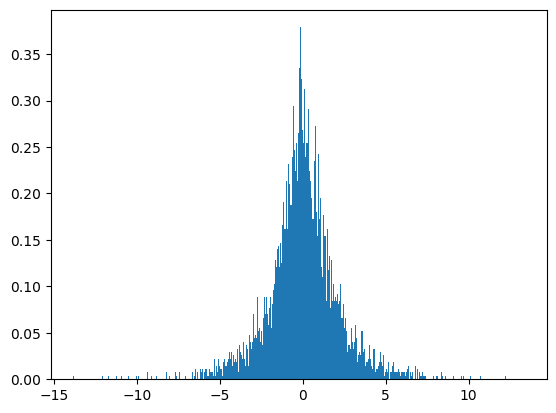

Chi-Square Statistic: 1155.085665711098
P-value: 0.00038745999131875
K-S Statistic: 0.0072500179290772016
P-value: 0.6665164456756163


In [8]:
loc = 0
scale = 1.5

sample = laplace_random_variable(10000, loc, scale)

expected_mean = loc
expected_variance = 2*scale**2
observed_mean = np.array(sample).mean()
observed_variance = np.array(sample).var()
print(f'Expected mean: {expected_mean}')
print(f'Observed mean: {observed_mean}')
print(f'Expected variance: {expected_variance}')
print(f'Observed variance: {observed_variance}')

count, bins, ignored = plt.hist(sample, 1000, density=True)
plt.show()

expected_freq = laplace.pdf(bins, loc, scale) * len(sample) * (bins[1] - bins[0])
observed_freq = count * len(sample) * (bins[1] - bins[0])
chi_square_stat = ((observed_freq - expected_freq[:-1]) ** 2 / expected_freq[:-1]).sum()
dof = len(bins) - 1 - 2
p_value = chi2.sf(chi_square_stat, dof)
print(f'Chi-Square Statistic: {chi_square_stat}')
print(f'P-value: {p_value}')

ks_stat, p_value = kstest(sample, 'laplace', args=(loc, scale))
print(f'K-S Statistic: {ks_stat}')
print(f'P-value: {p_value}')